In [86]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn import svm


In [87]:
df = pd.read_csv("CellDNA.csv", header= None)


In [88]:
df.columns =['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12','x13']

In [89]:
df.loc[:, 'x13'] = np.where(df.x13>0, 1, 0)

In [90]:
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,216,738.527778,216.449074,38.229761,9.556174,0.968254,12.847813,216,1,16.583719,0.640950,0.397059,98.589,0
1213,328,748.896341,47.664634,63.138991,9.101974,0.989555,57.919494,328,1,20.435816,0.607407,0.205257,131.431,1
1214,97,761.690722,207.288660,22.751513,8.230351,0.932275,-24.674618,97,1,11.113246,0.591463,0.384921,67.427,0
1215,223,770.654708,235.502242,53.491654,8.643053,0.986860,73.244715,223,1,16.850294,0.557500,0.252834,112.656,0


In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']] = scaler.fit_transform(df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']])

In [92]:
numeric_cols = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[ 0.15952762, -1.80200559, -1.20813407, ...,  0.34511514,
         0.65289142, -0.00691284],
       [-0.93921222, -1.80987674,  0.42436331, ...,  0.7072868 ,
         0.84374979, -0.81411281],
       [ 0.41024678, -1.67379037,  0.55538528, ..., -0.19189804,
         0.55503945,  0.20875597],
       ...,
       [-0.76223399,  1.58818067, -0.02859014, ..., -1.56321582,
        -0.56778731, -0.23578419],
       [ 0.16690172,  1.62978166,  0.17075035, ..., -1.85164337,
        -1.40231699,  0.69144818],
       [-0.83597492,  1.60332534,  0.38379311, ...,  1.53291195,
         1.69830929, -0.95601961]])

In [93]:
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.159528,-1.802006,-1.208134,0.114420,-0.135689,0.538311,-1.587426,0.135833,0.233292,0.329626,0.345115,0.652891,-0.006913,0
1,-0.939212,-1.809877,0.424363,-0.933511,-0.817247,0.019258,1.500586,-0.909580,0.233292,-1.221986,0.707287,0.843750,-0.814113,0
2,0.410247,-1.673790,0.555385,0.200447,0.134019,0.501621,1.684134,0.374384,0.233292,0.598252,-0.191898,0.555039,0.208756,0
3,-0.548385,-1.617137,1.879947,-1.059096,0.939523,-6.206504,1.253012,-0.537722,0.233292,-0.567479,0.896626,1.082702,-0.719501,0
4,0.181650,-1.525316,2.335905,0.578476,-0.417798,0.681969,-1.048779,0.156881,0.233292,0.354121,-0.402387,-1.404271,0.228457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.115283,1.480684,0.036132,0.252878,0.049329,0.537678,0.250896,0.093736,0.233292,0.280134,-1.142965,-0.491097,0.403063,0
1213,0.941181,1.528803,-1.156399,1.554010,-0.075675,0.729753,1.142193,0.879550,0.233292,1.113556,-1.427815,-1.702917,1.076351,1
1214,-0.762234,1.588181,-0.028590,-0.555628,-0.315562,0.213238,-0.491114,-0.741192,0.233292,-0.903431,-1.563216,-0.567787,-0.235784,0
1215,0.166902,1.629782,0.170750,1.050082,-0.201979,0.705453,1.445251,0.142849,0.233292,0.337809,-1.851643,-1.402317,0.691448,0


In [94]:
x = df.drop('x13', axis = 1).values
y = df['x13']
y = y.astype(int)

print(x.shape)
print(y.shape)

(1217, 13)
(1217,)


# check distribution of target_class column

In [95]:
df['x13'].value_counts()


0    1017
1     200
Name: x13, dtype: int64

In [96]:
df['x13'].value_counts()/np.float(len(df))


0    0.835661
1    0.164339
Name: x13, dtype: float64

In [97]:
round(df.describe(),2)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.16
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.37
min,-0.96,-1.82,-1.30,-1.21,-1.73,-6.23,-1.77,-0.93,-12.80,-1.27,-4.37,-2.28,-1.04,0.00
25%,-0.69,-0.82,-0.81,-0.76,-0.51,-0.21,-0.82,-0.66,0.23,-0.78,-0.62,-0.77,-0.68,0.00
50%,-0.30,-0.02,-0.19,-0.29,-0.25,0.37,-0.01,-0.29,0.23,-0.22,0.12,-0.00,-0.26,0.00
75%,0.38,0.89,0.58,0.58,0.12,0.63,0.81,0.35,0.23,0.57,0.77,0.74,0.39,0.00
max,6.55,1.64,2.57,6.37,9.39,0.81,1.77,6.71,0.23,4.75,1.91,2.72,8.50,1.00


In [98]:
clf = svm.SVC(probability=True)
clf.fit(x, y)  
results = clf.predict_proba(x)[0]

In [99]:
clf.support_vectors_

array([[-0.5483853 , -1.61713701,  1.87994654, ...,  0.89662564,
         1.08270245, -0.71950145],
       [ 0.64621776, -1.43758979, -0.16636889, ...,  0.56531025,
         1.66590892,  0.16941486],
       [ 1.64909439, -1.39855593,  0.13882352, ..., -1.97568425,
        -0.32889369,  2.48576347],
       ...,
       [ 0.55772864, -0.13732092, -0.58518741, ..., -0.71172753,
        -0.8172806 ,  0.59786186],
       [ 0.98542603,  0.3343214 ,  1.61671055, ..., -0.35219228,
        -1.12730684,  0.88169595],
       [ 0.94118147,  1.52880321, -1.15639909, ..., -1.42781464,
        -1.70291747,  1.0763514 ]])

In [100]:
clf.n_support_ 

array([169, 143], dtype=int32)

In [ ]:
print(clf.score(x, y), '\n')  

0.9276910435497124 



In [ ]:
clf.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
print(clf.decision_function(x), '\n')

[-1.08084927 -1.25233452 -1.33365989 ... -1.76057738 -0.20813551
 -1.41115986] 



In [102]:
clf= svm.SVC(kernel = 'linear')

In [103]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to predictors & target set
svc.fit(x,y)


# make predictions on predictors set
y_pred=svc.predict(x)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y, y_pred)))

Model accuracy score with default hyperparameters: 0.9277


In [104]:
# instantiate classifier with rbf kernel and C=1000
clf= svm.SVC(kernel = 'linear', C = 1000)
# fit classifier to predictors & target set
clf.fit(x,y)
# of support vectors in EACH class
print(clf.n_support_) 
# indices of support vectors
print(clf.support_)  
# coefficients in ”primary” form
print(clf.coef_)  
# coefficients in ”dual” form
print(clf.dual_coef_)  
# make predictions on predictors set
y_pred=clf.predict(x)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000 : {0:0.4f}'. format(accuracy_score(y, y_pred)))

[113 110]
[  13   22   28   52   72   73   76   77   86   97  101  166  188  261
  271  274  277  291  305  309  312  313  325  335  342  363  405  485
  511  517  527  528  532  533  545  562  563  564  575  576  580  586
  601  606  608  609  611  729  743  744  773  818  860  861  872  885
  909  964  972  976 1011 1024 1027 1028 1029 1032 1033 1040 1044 1049
 1051 1063 1064 1066 1070 1072 1074 1077 1081 1083 1085 1090 1093 1097
 1102 1106 1108 1112 1113 1114 1117 1124 1125 1126 1128 1130 1132 1133
 1134 1136 1138 1141 1142 1143 1144 1157 1173 1179 1187 1188 1203 1207
 1215    4   15   17   35   43   74   98  119  123  144  163  167  183
  203  214  219  220  221  225  226  228  234  245  250  251  252  256
  257  259  266  289  297  321  326  328  329  333  338  339  341  417
  433  437  438  439  441  457  462  465  487  489  490  491  495  498
  519  521  525  550  554  578  583  585  596  597  610  617  623  624
  632  657  673  702  708  723  725  735  780  784  790  791  797  

In [105]:
print(clf.predict(x), '\n')  

[0 0 0 ... 0 1 0] 



In [ ]:
print(clf.score(x, y), '\n')   

0.9178307313064914 



In [106]:
print(clf.decision_function(x), '\n') 

[-1.44783076 -2.73494909 -2.69961638 ... -2.9482961   0.06799006
 -3.11732434] 



In [107]:
# Support vectors content values
print(clf.support_vectors_) 

[[-0.04694698 -1.31338801  2.50887484 ...  0.11107933 -1.22335795
   0.03939855]
 [ 0.04891623 -1.05894919  1.70865549 ...  0.99108125  2.27380761
  -0.19629958]
 [ 2.75520833 -0.87846275 -0.41747922 ... -1.52948211 -0.646354
   2.90504659]
 ...
 [ 0.41024678  1.24591731 -0.16948148 ... -0.01803752 -0.64883306
   0.34523004]
 [ 0.24801674  1.56018396 -0.75703818 ... -0.37610604 -0.92911486
   0.39525208]
 [ 0.98542603  0.3343214   1.61671055 ... -0.35219228 -1.12730684
   0.88169595]]


In [109]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[976  41]
 [ 51 149]]

True Positives(TP) =  976

True Negatives(TN) =  149

False Positives(FP) =  41

False Negatives(FN) =  51


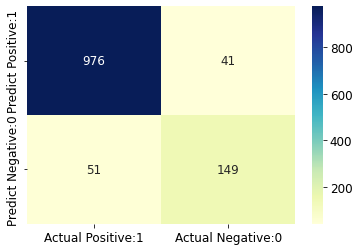

In [110]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1017
           1       0.78      0.74      0.76       200

    accuracy                           0.92      1217
   macro avg       0.87      0.85      0.86      1217
weighted avg       0.92      0.92      0.92      1217



In [112]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [113]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9244


In [114]:

x = df.drop('x13', axis = 1).values[50:, 2:4]
y = df['x13'][50:]
C = 1.0  
# SVM regularization parameter
clf = svm.SVC(kernel = 'linear', C = C, probability=True)
clf.fit(x, y)
yhat = clf.predict_proba(x) 
y_pred = clf.predict(x)


In [115]:
print(y.shape, y.size)
print(y_pred)
print(yhat)

(1167,) 1167
[0 0 0 ... 0 0 0]
[[0.98563836 0.01436164]
 [0.97646447 0.02353553]
 [0.65174412 0.34825588]
 ...
 [0.9650246  0.0349754 ]
 [0.62450023 0.37549977]
 [0.98598946 0.01401054]]


roc_auc_0:  0.07844799271039722
roc_auc_1:  0.9215520072896027 



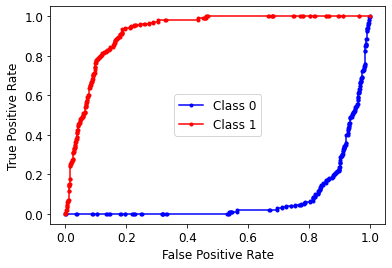

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score
fpr_0, tpr_0, _=roc_curve(y, yhat[:,0])
roc_auc_0=roc_auc_score(y, yhat[:,0])
fpr_1, tpr_1, _=roc_curve(y, yhat[:,1])
roc_auc_1=roc_auc_score(y, yhat[:,1])
# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')
plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [117]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6722


In [118]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score
linear_svc=SVC(kernel='linear', C=1.0) 

Cross_validated_ROC_AUC = cross_val_score(linear_svc, x, y, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9285
